In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch
import numpy as np # Import numpy


In [ ]:


# Define the model building function for the tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                           activation='relu',
                           kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_1', values=[1e-1, 1e-2, 1e-3, 1e-4])),
                           input_shape=(10,)))  # Replace with the actual number of features in your data

    for i in range(hp.Int('num_layers', 1, 3)):  # Add up to 3 hidden layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=32),
                               activation='relu',
                               kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_' + str(i+2), values=[1e-1, 1e-2, 1e-3, 1e-4]))))

    model.add(layers.Dense(1, activation='sigmoid')) # Assuming binary classification

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:

# Generate some synthetic data for demonstration purposes
X_train = np.random.rand(100, 10) # 100 samples with 10 features
y_train = np.random.randint(0, 2, 100) # 100 binary labels
X_val = np.random.rand(20, 10) # 20 samples with 10 features
y_val = np.random.randint(0, 2, 20) # 20 binary labels

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Adjust the number of trials as needed
    executions_per_trial=1,  # Adjust the number of executions per trial as needed
    directory='my_dir',
    project_name='hyperparameter_tuning')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best model


Reloading Tuner from my_dir/hyperparameter_tuning/tuner0.json


In [ ]:

best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full training data
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4178 - loss: 4.6701 - val_accuracy: 0.2500 - val_loss: 4.5056
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5533 - loss: 4.4611 - val_accuracy: 0.7000 - val_loss: 4.3056
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6011 - loss: 4.2746 - val_accuracy: 0.7000 - val_loss: 4.1221
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5636 - loss: 4.0944 - val_accuracy: 0.7000 - val_loss: 3.9486
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6581 - loss: 3.9182 - val_accuracy: 0.5000 - val_loss: 3.8032
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6751 - loss: 3.7534 - val_accuracy: 0.5500 - val_loss: 3.6452
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6876 - loss: 3.5946 - val_accuracy: 0.4000 - val_loss: 3.5034
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5662 - loss: 3.4443 - val_accuracy: 0.2000 - val_loss: 3.3771

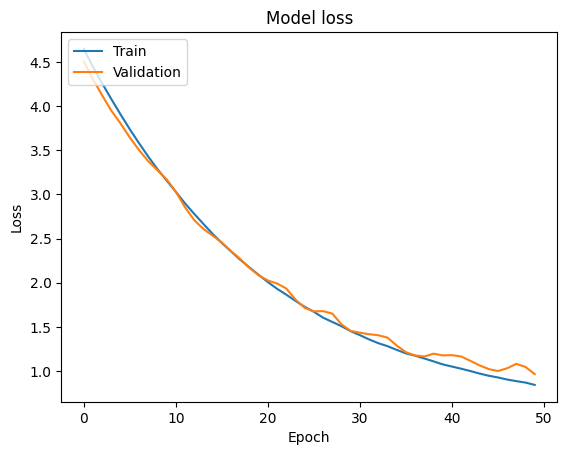

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


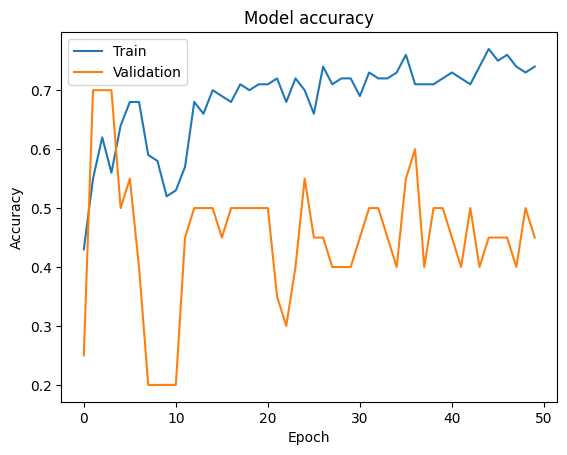

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()